<a href="https://colab.research.google.com/github/juno2856/deeplearning/blob/master/NLP/%EC%B5%9C%EC%A4%80%ED%98%B8_tfidf_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
csv_path = '/content/drive/MyDrive/자연어처리/news_data.csv'

In [ ]:
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0       파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1       동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2       황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3       귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4       서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
                              ...                        
5244    신종 코로나바이러스 감염증코로나 사태 이후 가정의 달 월에도 언택트비대면 신풍속도가...
5245    는 소비자로부터 월 이용료 만만원을 받고 초고속 인터넷을 제공한다 그런 브로드밴드가...
5246    머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이 ...
5247    가 오는 일 정식 출시하는 스마트폰 벨벳이 사실상 공짜폰이 될 전망이다 단말기 가격...
5248    이미지제공게티이미지뱅크 이미지제공게티이미지뱅크  전자신문  전자신문인터넷 무단전재 ...
Name: news, Length: 5249, dtype: object

In [ ]:
# null 값이 있는지 체크
print(df.isnull().values.any())

False


In [ ]:
# 중복된 샘플 제거 (drop_duplicate활용)
df.drop_duplicates(subset = ['news'], inplace = True)

In [ ]:
df['code'].unique()

array(['사회', '생활/문화', 'IT/과학'], dtype=object)

In [ ]:
df.replace({'code':{'사회': '0', '생활/문화':'1', 'IT/과학':'2'}}, inplace = True)

In [ ]:
df

,news,code
0,파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...,0
1,동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...,0
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...,0
3,귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...,0
4,서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...,0
...,...,...
4950,신종 코로나바이러스 감염증코로나 사태 이후 가정의 달 월에도 언택트비대면 신풍속도가...,2
4951,는 소비자로부터 월 이용료 만만원을 받고 초고속 인터넷을 제공한다 그런 브로드밴드가...,2
4952,머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이 ...,2
4953,가 오는 일 정식 출시하는 스마트폰 벨벳이 사실상 공짜폰이 될 전망이다 단말기 가격...,2


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

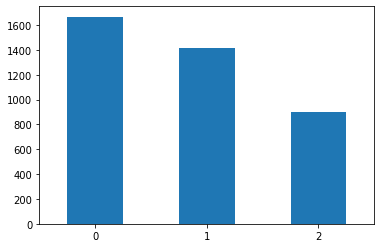

In [ ]:
# '사회': '0', '생활/문화':'1', 'IT/과학':'2' 
df['code'].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)

In [ ]:
df.groupby('code').size().reset_index(name='count')

,code,count
0,0,1668
1,1,1414
2,2,903


# 불용어 제거

In [ ]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()

In [ ]:
def preprocessing(data):
    text_data = []

    for sentence in data:
        temp_data = []
        temp_data = mecab.morphs(sentence)
        temp_data = [word for word in temp_data if not word in stopwords]
        text_data.append(temp_data)

    text_data = list(map(' '.join, text_data))
    return text_data

In [ ]:
# df(df['news'])을 기준으로 불용어 제거하기.
text_data = preprocessing(df['news'])
# preprocessing(df['news'])

In [ ]:
# text_data 출력하기
print(text_data[0:10])

['파주 시청 사진제 공파 주시 파주 시청 사진 제공 파주시 파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 다파 주 시민 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 정부 발표 긴급 재난 지원금 파주 시민 지급 금액 다른 이유 국비 지방비 부담 비율 다파 주 시 이미 모든 시민 경기도 파주시 재난 기본 소득 인 당 각 만 원 지급 고 어 시민 국비 지원금 만 지급 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 아닌 시민 오 월일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 긴급 재난 지원금 추진 태 스 크 포스 를 구성 해 긴급 재난 지원금 원활 게 지급 될 도록 지원 한다 권 자 재 배포', '동영상 천 물류 창고 화재 발화 지점 으로 지목 된 지하 층 에서 산소 절단기 산소 공급 호스 끊어진 채 발견 돼 경찰 폭발 가능 성 수사 고 습니다 확보 현장 감식 사진 보 면 산소 절단기 와 연결 된 산소 공급 호스 날카롭 게 절단 돼 었 습니다 전문가 산소 공급 호스 기계 적 충격 의해 절단 됐 고 실제 산소 샜 다면 폭발 일어날 다는 의견 제시 습니다 지하 층 에선 밖 도 전동 절단기 와 그라인더 불꽃 발생 시킬 작업 도구 다수 나와 경찰 집중 분석 고 습니다 경찰 또 건물 옆 에서 우레탄 혼합 해 작업 현장 으로 보내 차량 발견 해 화재 당시 우레탄 폼 발포 작업 함께 불꽃 튀 화기 작업 동시 진행 됐 는지 를 조사 고 습니다 당신 제보 됩니다 여러분 소중 제보 를 기다립니다 카카오톡 검색 해 채널 추가 전화 메일 온라인 제보 권 자 재 배포', '황범 순 의정부 시 부시장 지대 학교 의정부 캠퍼스 부속 병원 공사 현장 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target = df['code']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(text_data, target, test_size = 0.2, shuffle = True, stratify=target)

## TF-IDF 모델 준비


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 나이브베이즈모델
from sklearn import metrics

In [ ]:
# DTM
# TF-IDF
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train) # DTM 완성

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts) # TF_IDF 완성

In [ ]:
# 모델 학습 (나이브베이즈 모델)
clf = MultinomialNB().fit(x_train_tfidf, y_train)

# 결과확인하기

In [ ]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."           
])

In [ ]:
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

In [ ]:
print(clf.predict(tfidf_vectorizer(new_sent)))

['0']


In [ ]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."  
])

In [ ]:
print(clf.predict(tfidf_vectorizer(new_sent)))

['2']


## 정확도 확인하기

In [ ]:
x_test_tfidf = tfidf_vectorizer(x_test)

In [ ]:
#x_test에 대한 모델이 predict결과를 y_pred에 결과 저장하기
# metrics.classification_report로 모델이 예측한 y_pred와 실제 정답데이터 y_test 두개의 리포트 출력하기
y_pred = clf.predict(x_test_tfidf)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       333
           1       0.87      0.74      0.80       283
           2       0.91      0.76      0.83       181

    accuracy                           0.82       797
   macro avg       0.85      0.81      0.82       797
weighted avg       0.84      0.82      0.82       797



# 2. 딥러닝(LSTM)으로 모델 설계

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [ ]:
df

,news,code
0,파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...,0
1,동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...,0
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...,0
3,귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...,0
4,서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...,0
...,...,...
4950,신종 코로나바이러스 감염증코로나 사태 이후 가정의 달 월에도 언택트비대면 신풍속도가...,2
4951,는 소비자로부터 월 이용료 만만원을 받고 초고속 인터넷을 제공한다 그런 브로드밴드가...,2
4952,머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이 ...,2
4953,가 오는 일 정식 출시하는 스마트폰 벨벳이 사실상 공짜폰이 될 전망이다 단말기 가격...,2


In [ ]:
print(len(df['code']))
print(len(df['news']))

3985
3985


In [ ]:
def preprocessing(data):
    text_data = []

    for sentence in data:
        temp_data = []
        temp_data = mecab.morphs(sentence)
        temp_data = [word for word in temp_data if not word in stopwords]
        text_data.append(temp_data)

    # text_data = list(map(' '.join, text_data))
    return text_data

In [ ]:
def load_data(train_data, num_words =10000):
  

  # 토큰화 및 불용어 제거
  x_train = preprocessing(train_data['news'])


  # 단어장 만드는 중..
  words = np.concatenate(x_train).tolist()
  counter = Counter(words)
  counter = counter.most_common(10000-4)    #빈도수
  # print(counter)
  vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
  # print(vocab)
  word_to_index = {word:index for index, word in enumerate(vocab)}

  def wordlist_to_indexlist(wordlist):
      return [word_to_index[word] if word in word_to_index else word_to_index ['<UNK>'] for word in wordlist]

  x_train = list(map(wordlist_to_indexlist, x_train))

  return x_train, np.array(list(train_data['code'])), word_to_index

In [ ]:
x_data, y_data, word_to_index = load_data(df)

In [ ]:
print(len(word_to_index))

10000


In [ ]:
len(y_data)

3985

In [ ]:
#데이터 셋 내 문장 길이 분포
total_data_text = list(x_data)

# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장 길이의 평균값, 최댓값, 표준편차를 계산
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를 들면 최대길이를 (평균 +2*표준편차)로 한다면,
max_tokens = np.mean(num_tokens) +2*np.std(num_tokens)

maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함된다.'.format(np.sum(num_tokens < max_tokens)/len(num_tokens)))

문장길이 평균 :  308.7048933500627
문장길이 최대 :  6008
문장길이 표준편차 :  293.21755702498234
pad_sequences maxlen :  895
전체 문장의 0.9761606022584692%가 maxlen 설정값 이내에 포함된다.


In [ ]:
# 패딩 추가
x_data = pad_sequences(x_data, value = word_to_index['<PAD>'], padding = 'pre', maxlen = maxlen)

In [ ]:
y_data = to_categorical(y_data)

In [ ]:
print(len(y_data))
print(len(x_data))

3985
3985


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, stratify=target)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(3188, 895)
(3188, 3)


In [ ]:
vocab_size = 10000
embedding_dim = 128
hidden_units = 128
num_classes = 3

abc = Sequential()
abc.add(Embedding(vocab_size, embedding_dim))
abc.add(LSTM(hidden_units))
abc.add(Dense(num_classes, activation = 'softmax'))
abc.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,411,971
Trainable params: 1,411,971
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose =1, patience = 4)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_loss', model = 'max', verbose =1, save_best_only = True)

In [ ]:
abc.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

In [ ]:
history = abc.fit(x_train, y_train, batch_size = 128, epochs = 10000, callbacks=[es, mc], validation_data =(x_test, y_test))

Epoch 1/10000
25/25 [==============================] - ETA: 0s - loss: 1.0293 - accuracy: 0.4602
Epoch 1: val_loss improved from inf to 0.94116, saving model to best_model.h5
25/25 [==============================] - 105s 4s/step - loss: 1.0293 - accuracy: 0.4602 - val_loss: 0.9412 - val_accuracy: 0.5734
Epoch 2/10000
25/25 [==============================] - ETA: 0s - loss: 0.7522 - accuracy: 0.6785
Epoch 2: val_loss improved from 0.94116 to 0.65247, saving model to best_model.h5
25/25 [==============================] - 98s 4s/step - loss: 0.7522 - accuracy: 0.6785 - val_loss: 0.6525 - val_accuracy: 0.6989
Epoch 3/10000
25/25 [==============================] - ETA: 0s - loss: 0.3772 - accuracy: 0.8654
Epoch 3: val_loss improved from 0.65247 to 0.54217, saving model to best_model.h5
25/25 [==============================] - 100s 4s/step - loss: 0.3772 - accuracy: 0.8654 - val_loss: 0.5422 - val_accuracy: 0.7880
Epoch 4/10000
25/25 [==============================] - ETA: 0s - loss: 0.1985 

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도 : %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

25/25 [==============================] - 7s 247ms/step - loss: 0.5422 - accuracy: 0.7880

 테스트 정확도 : 0.7880


In [ ]:
print(history.history)

{'loss': [1.0292894840240479, 0.752234935760498, 0.3772124648094177, 0.19853396713733673, 0.1284857988357544, 0.06849316507577896, 0.048083990812301636], 'accuracy': [0.4601631164550781, 0.6784818172454834, 0.865432858467102, 0.9397741556167603, 0.9598494172096252, 0.9814931154251099, 0.9871392846107483], 'val_loss': [0.941158652305603, 0.6524685025215149, 0.5421674847602844, 0.5847421288490295, 0.5871067643165588, 0.6951873898506165, 0.7437001466751099], 'val_accuracy': [0.5734002590179443, 0.6988707780838013, 0.7879548072814941, 0.7992472052574158, 0.8055207133293152, 0.7854453921318054, 0.7917189598083496]}


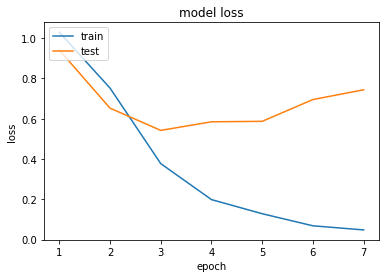

In [ ]:
epochs = range(1, len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()